**LIBRARIES USED**

In [1]:
# --- Data Manipulation and Analysis ---
# pandas: Essential for structured data operations (DataFrames)
import pandas as pd
# numpy: High-performance library for numerical operations and array handling
import numpy as np

# --- Data Visualization ---
# matplotlib: The foundational library for creating static plots
import matplotlib.pyplot as plt
# seaborn: High-level interface for creating attractive statistical graphics
import seaborn as sns

# --- Error Management ---
# warnings: Used to control warning messages (ignoring them keeps the output clean)
import warnings
warnings.filterwarnings('ignore')

# --- Preprocessing & Feature Engineering ---
# StandardScaler, MinMaxScaler, RobustScaler: Tools for feature scaling (normalization/standardization)
# LabelEncoder, OneHotEncoder: Used for transforming categorical labels into numerical formats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder

# SimpleImputer, KNNImputer: Algorithms to handle missing values (NaNs) in the dataset
from sklearn.impute import SimpleImputer, KNNImputer

# --- Feature Selection & Dimensionality Reduction ---
# SelectKBest, f_classif, mutual_info_classif: Techniques to select the most relevant features for the model
# PCA: Principal Component Analysis, used to reduce the number of variables while preserving variance
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.decomposition import PCA

# --- Machine Learning: KNN Model & Evaluation ---
# KNeighborsClassifier: The core algorithm for K-Nearest Neighbors classification
from sklearn.neighbors import KNeighborsClassifier
# train_test_split: Splits data into training and testing sets to validate model performance
# cross_val_score: Evaluates model stability using different subsets of the data
from sklearn.model_selection import train_test_split, cross_val_score
# Metrics: Used to measure how well the model is performing (accuracy, recall, precision, etc.)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Visualization Configuration ---
# Setting the visual theme to 'seaborn-v0_8' for cleaner aesthetics
plt.style.use('seaborn-v0_8')
# Choosing a color palette for categorical consistency
sns.set_palette("husl")
# Inline command to ensure plots render directly in the Jupyter Notebook interface
%matplotlib inline

**FILES IMPORT & UNION**

In [2]:
# --- Data Acquisition & Integration ---
# Loading individual datasets from local CSV files
# sp1 and sp2 represent split parts of the primary Spotify database
sp1 = pd.read_csv('data/spotify_parte_1.csv')
sp2 = pd.read_csv('data/spotify_parte_2.csv')

# Combining both parts into a single DataFrame
# ignore_index=True ensures the new DataFrame has a continuous index from 0 to N-1,
# preventing duplicate index labels from the original files
df = pd.concat([sp1, sp2], ignore_index=True)

# --- Initial Data Exploration ---
# Retrieving the first 500 records to perform a visual inspection of the feature 
# distributions, detect potential NaNs, and understand the data types (Schema)
df.head(500)

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,Ramshackle Glory,Introduction,5gHKYgKMiKfGhEsSONzej8,10,2012,acoustic,0.272,0.700,0,-10.424,1,0.0497,0.2160,0.000000,0.8280,0.238,71.719,271093,4
496,496,Tyler Ward,Ho Hey,3YbOccoztkmTTd4SqteNMb,20,2012,acoustic,0.457,0.450,0,-9.207,1,0.0322,0.3680,0.000090,0.1530,0.156,154.839,147484,4
497,497,Dave Barnes,White Flag,0NSLR0NMQ9XhlFafhFCAM5,10,2012,acoustic,0.670,0.915,1,-5.111,1,0.0451,0.0500,0.000005,0.3400,0.881,104.975,204680,4
498,498,Erin McCarley,Amber Waves,6JHHlemyLhmCKDkAE0yWWP,9,2012,acoustic,0.511,0.908,9,-5.965,0,0.0405,0.0193,0.000043,0.6770,0.477,148.027,254680,4


**EXPLORATORY DATA ANALYSIS**

In [4]:
# --- Dataset Dimensionality Analysis ---
# Accessing the 'shape' attribute to determine the total size of the integrated dataset.
# This returns a tuple representing (number_of_rows, number_of_columns).
# Monitoring shape is essential after a concatenation to verify that all records 
# from 'sp1' and 'sp2' were successfully merged without losing features.
df.shape

(1159748, 20)

In [5]:
# --- Attribute Schema Inspection ---
# Accessing the 'dtypes' attribute to identify the data type of each feature.
# This step is critical to distinguish between continuous numerical variables 
# (float64/int64) and categorical/text variables (object).
# It helps determine which columns require mathematical scaling and which 
# need encoding (like One-Hot or Label Encoding) before modeling.
df.dtypes

Unnamed: 0            int64
artist_name          object
track_name           object
track_id             object
popularity            int64
year                  int64
genre                object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
dtype: object

In [6]:
# --- Data Integrity & Completeness Check ---
# Calculating the total number of missing values (NaNs) for each feature.
# .isna() detects null values, and .sum() aggregates them per column.
# This is a fundamental step to decide on an imputation strategy (like using 
# SimpleImputer or KNNImputer) or to determine if certain rows/columns 
# should be dropped due to insufficient data.
df.isna().sum()

Unnamed: 0          0
artist_name         0
track_name          0
track_id            0
popularity          0
year                0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

#### **FEATURE ENGINEERING & SELECTION**

In [7]:
# --- Data Cleaning: Record Filtering ---
# Removing all rows that contain at least one missing value (NaN) across any column.
# This ensures a "complete case" dataset, which is a common strategy when the 
# proportion of missing data is small. 
# By overwriting the 'df' variable, we provide a clean, consistent input for 
# subsequent scaling and machine learning algorithms.
df = df.dropna()

In [8]:
# --- Feature Selection: Dimensionality Reduction ---
# Removing non-predictive or redundant columns from the dataset.
# Columns like 'track_id' and 'track_name' are identifiers that do not contribute 
# to the mathematical patterns used by machine learning models.
# 'Unnamed: 0' is typically a residual index from the CSV file that should be removed.
spotify = df.drop(columns=['Unnamed: 0', 'artist_name', 'track_name', 'track_id', 'year'])

# --- Schema Verification ---
# Displaying the updated list of columns to confirm the successful removal 
# of unnecessary features and to verify the remaining feature set before scaling.
spotify.columns

Index(['popularity', 'genre', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [9]:
# --- Descriptive Statistical Summary ---
# Generating a comprehensive summary of the central tendency, dispersion, 
# and shape of the dataset's distribution.
# This includes count, mean, standard deviation, minimum, maximum, and 
# percentiles (25%, 50%, 75%) for all numerical features.
# It is vital for detecting scaling needs, identifying outliers, and 
# understanding the range of audio features like tempo or loudness.
spotify.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06
mean,1.838309e+01,5.374425e-01,6.396737e-01,5.287763e+00,-8.981292e+00,6.346560e-01,9.281520e-02,3.215380e-01,2.523423e-01,2.230197e-01,4.555689e-01,1.213775e+02,2.495587e+05,3.885880e+00
std,1.588563e+01,1.844753e-01,2.704993e-01,3.555204e+00,5.682203e+00,4.815267e-01,1.268416e-01,3.549873e-01,3.650701e-01,2.010712e-01,2.685169e-01,2.977964e+01,1.494243e+05,4.676983e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.073000e+03,0.000000e+00
25%,5.000000e+00,4.130000e-01,4.540000e-01,2.000000e+00,-1.082900e+01,0.000000e+00,3.710000e-02,6.400000e-03,1.050000e-06,9.790000e-02,2.260000e-01,9.879800e+01,1.810910e+05,4.000000e+00
50%,1.500000e+01,5.500000e-01,6.940000e-01,5.000000e+00,-7.450000e+00,1.000000e+00,5.070000e-02,1.470000e-01,1.760000e-03,1.340000e-01,4.380000e-01,1.219310e+02,2.257405e+05,4.000000e+00
75%,2.900000e+01,6.770000e-01,8.730000e-01,8.000000e+00,-5.276000e+00,1.000000e+00,8.900000e-02,6.400000e-01,6.140000e-01,2.920000e-01,6.740000e-01,1.399030e+02,2.869070e+05,4.000000e+00
max,1.000000e+02,9.930000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.710000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.499930e+02,6.000495e+06,5.000000e+00


In [10]:
# --- Outlier Removal and Data Sanity Filtering ---
# Filtering the dataset to retain only records with realistic 'loudness' values.
# In standard digital audio (dBFS), loudness should be 0 or negative; values 
# above 0 are typically anomalies, measurement errors, or extreme clipping.
# This cleaning step prevents these outliers from distorting the feature 
# scaling (MinMax or Standard) and improves the reliability of the model.
spotify = spotify[spotify['loudness'] <= 0]

In [11]:
# --- Feature Engineering: Time Unit Conversion ---
# Converting 'duration_ms' to 'duration_min' by dividing by 60,000.
# This transforms the scale from large integers (milliseconds) to 
# more interpretable floating-point values (minutes).
spotify['duration_min'] = spotify['duration_ms'] / 60000

# --- Cleanup: Removing the original column ---
# Dropping the original millisecond column to avoid redundancy in the model,
# as both features represent the same information on different scales.
spotify = spotify.drop(columns=['duration_ms'])

# --- Verification ---
# Checking the first few rows to ensure the conversion is accurate 
# (e.g., 180,000 ms should now be 3.0 min).
print(spotify[['duration_min']].head())

   duration_min
0      4.002767
1      3.606450
2      2.649333
3      5.071550
4      4.072000


#### **FEATURE SCALING**

- Numerical variables

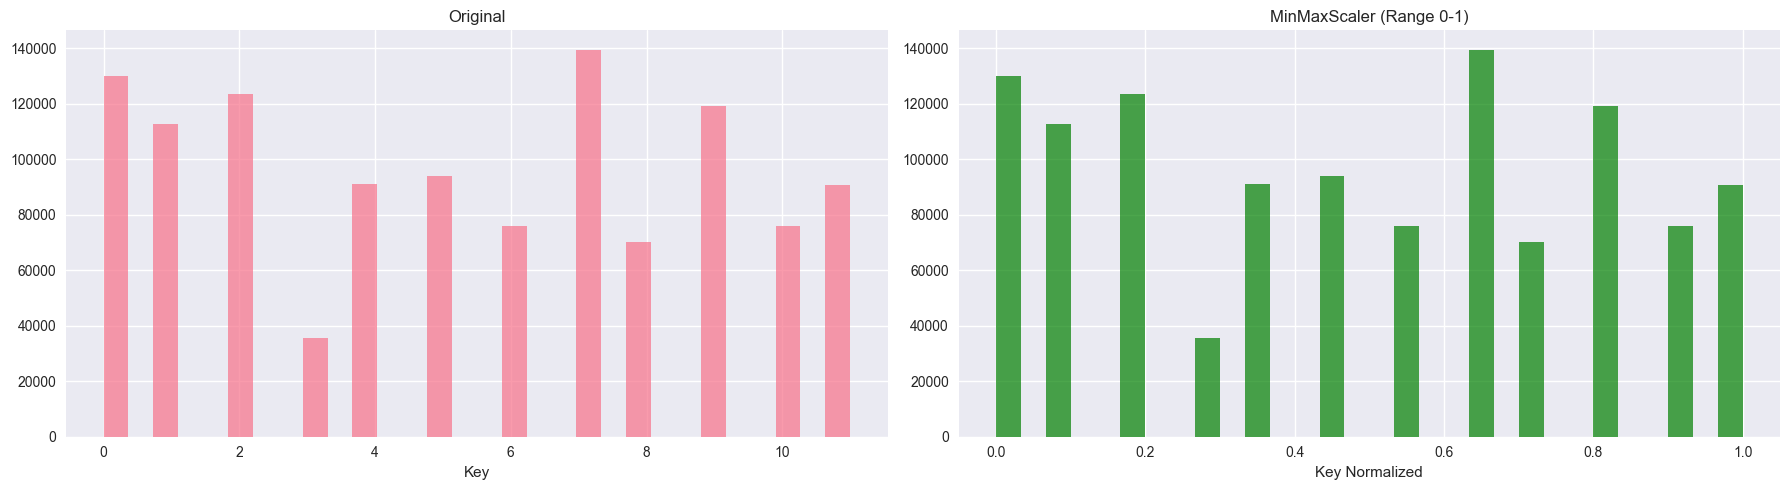

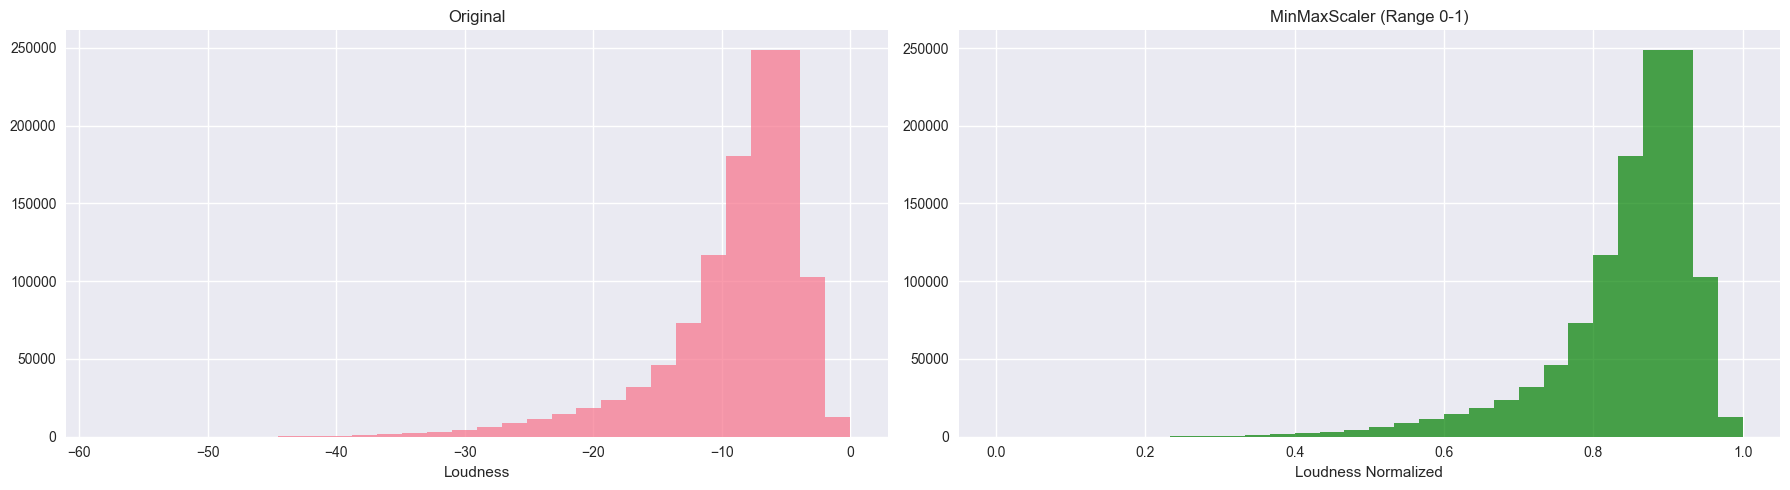

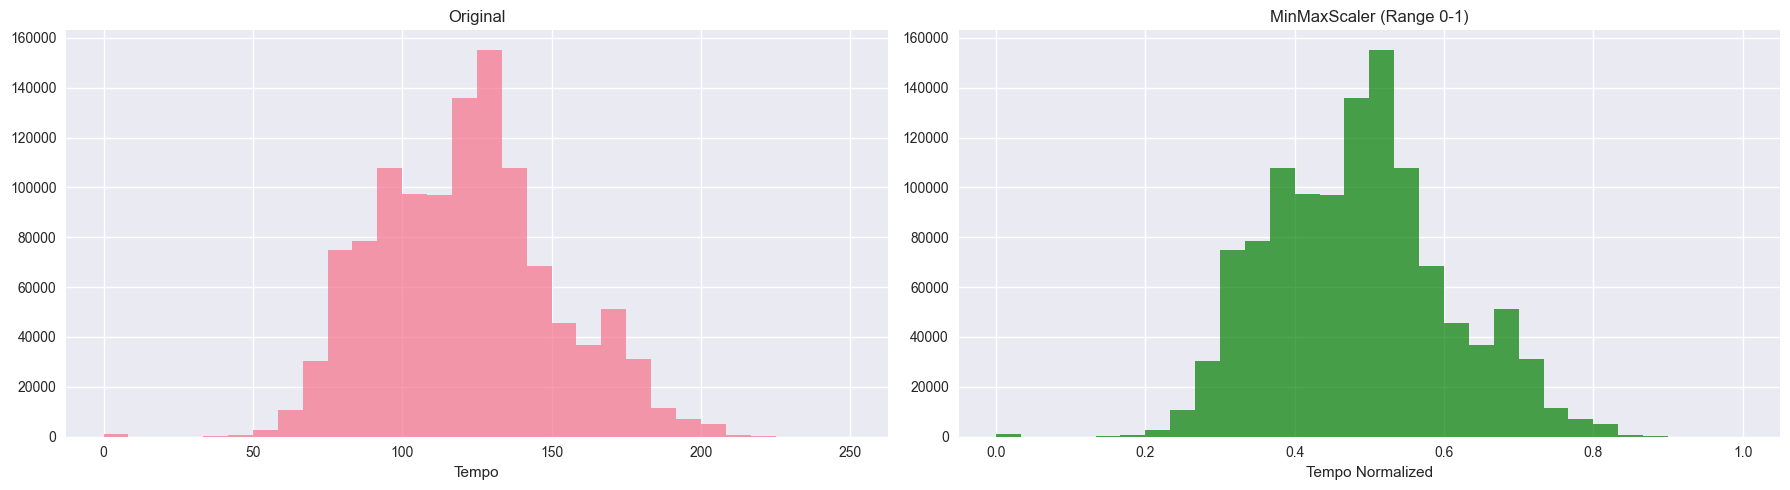

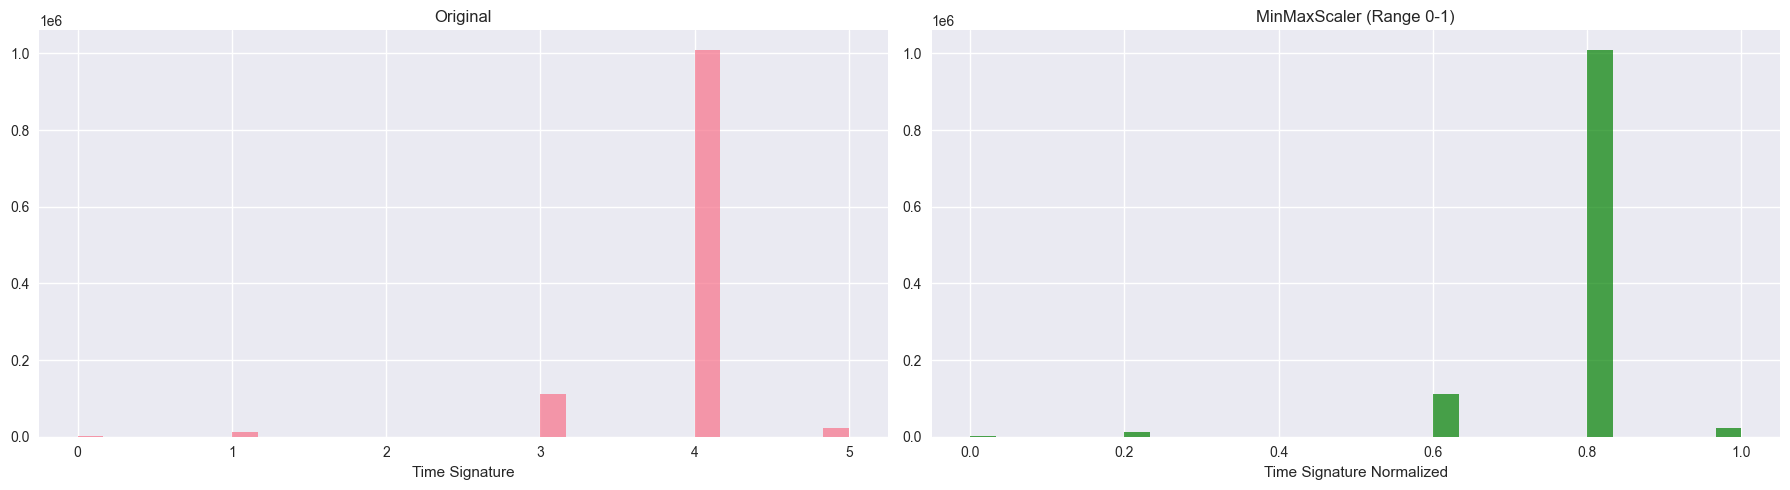

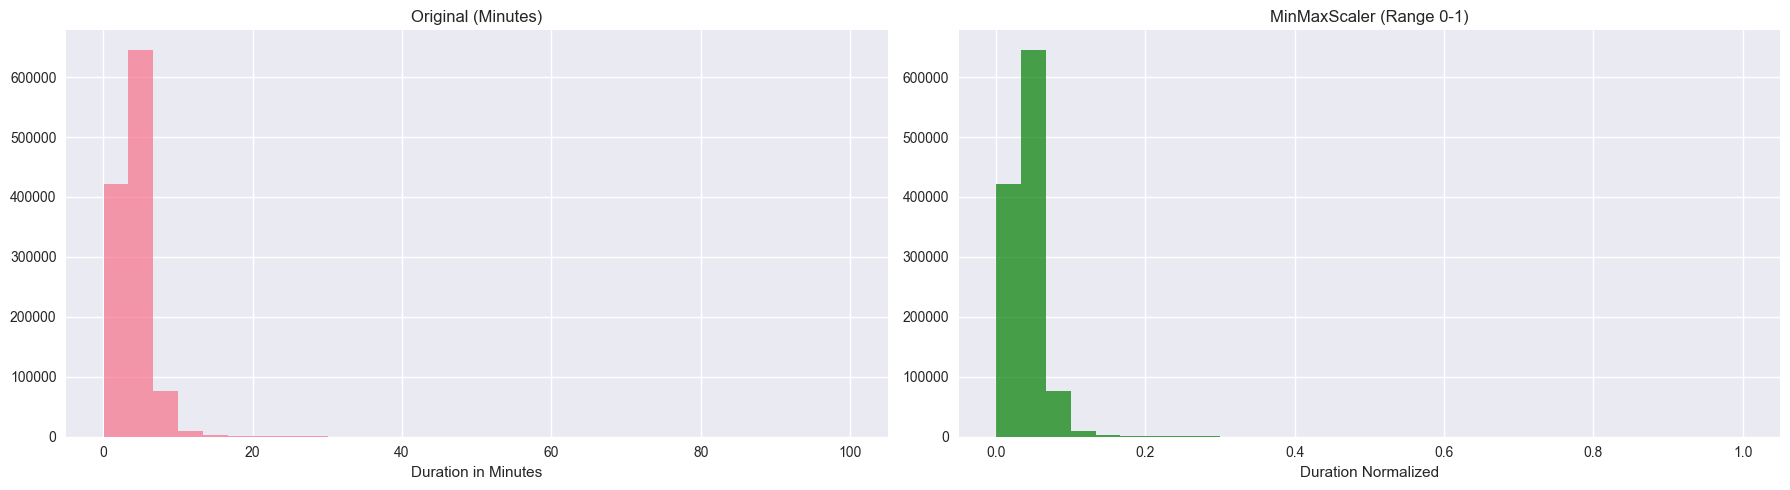

In [12]:
# --- Feature Isolation for Scaling ---
# Selecting the specific numerical features that require normalization.
# We create a deep copy of these columns to avoid 'SettingWithCopy' warnings 
# and to keep the original data intact for comparison.
numeric_standard_scaler = ['key', 'loudness', 'tempo', 'duration_min', 'time_signature']
X_numeric = spotify[numeric_standard_scaler].copy()

# --- Min-Max Normalization ---
# Initializing and applying the MinMaxScaler to transform features to a [0, 1] range.
# This ensures that variables with larger absolute ranges (like tempo) do not 
# dominate the distance calculations in the KNN model over smaller ones (like key).
scaler_minmax = MinMaxScaler()
X_scaled_minmax = scaler_minmax.fit_transform(X_numeric)

# Converting the resulting NumPy array back into a DataFrame for easier plotting,
# adding a '_minmax' suffix to distinguish these from the raw features.
df_scaled_minmax = pd.DataFrame(X_scaled_minmax, columns=[f'{col}_minmax' for col in numeric_standard_scaler])

# --- Distribution Comparison: Key ---
# Comparing the raw 'key' values (0-11) against the normalized output.
# This helps verify that the categorical nature of the key is preserved 
# while being compressed into the unit interval.
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

axes[0].hist(X_numeric['key'], bins=30, alpha=0.7)
axes[0].set_title('Original')
axes[0].set_xlabel('Key')

axes[1].hist(df_scaled_minmax['key_minmax'], bins=30, alpha=0.7, color='green')
axes[1].set_title('MinMaxScaler (Range 0-1)')
axes[1].set_xlabel('Key Normalized')

plt.tight_layout()
plt.show()

# --- Distribution Comparison: Loudness ---
# Visualizing the shift from decibels (negative values) to a positive [0, 1] scale.
# This confirms that the relative volume differences between tracks are maintained.
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

axes[0].hist(X_numeric['loudness'], bins=30, alpha=0.7)
axes[0].set_title('Original')
axes[0].set_xlabel('Loudness')

axes[1].hist(df_scaled_minmax['loudness_minmax'], bins=30, alpha=0.7, color='green')
axes[1].set_title('MinMaxScaler (Range 0-1)')
axes[1].set_xlabel('Loudness Normalized')

plt.tight_layout()
plt.show()

# --- Distribution Comparison: Tempo ---
# Tempo often has high variance; this visualization shows how the BPM 
# values are remapped while keeping the same density distribution.
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

axes[0].hist(X_numeric['tempo'], bins=30, alpha=0.7)
axes[0].set_title('Original')
axes[0].set_xlabel('Tempo')

axes[1].hist(df_scaled_minmax['tempo_minmax'], bins=30, alpha=0.7, color='green')
axes[1].set_title('MinMaxScaler (Range 0-1)')
axes[1].set_xlabel('Tempo Normalized')

plt.tight_layout()
plt.show()

# --- Distribution Comparison: Time Signature ---
# Inspecting how the discrete time signature categories are scaled.
# Note that since most songs are in 4/4, we expect to see high peaks 
# concentrated at specific points in both plots.
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

axes[0].hist(X_numeric['time_signature'], bins=30, alpha=0.7)
axes[0].set_title('Original')
axes[0].set_xlabel('Time Signature')

axes[1].hist(df_scaled_minmax['time_signature_minmax'], bins=30, alpha=0.7, color='green')
axes[1].set_title('MinMaxScaler (Range 0-1)')
axes[1].set_xlabel('Time Signature Normalized')

plt.tight_layout()
plt.show()

# --- Distribution Comparison: Duration (Minutes) ---
# Visualizing the conversion and normalization of track length.
# Scaling duration is essential for KNN because raw minute values (e.g., 3.5) 
# would carry more weight than normalized features (0 to 1) if left unscaled.
# The histogram shape remains identical, confirming a linear transformation.
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Plotting the raw duration in minutes (calculated from ms)
axes[0].hist(X_numeric['duration_min'], bins=30, alpha=0.7)
axes[0].set_title('Original (Minutes)')
axes[0].set_xlabel('Duration in Minutes')

# Plotting the Min-Max normalized version
axes[1].hist(df_scaled_minmax['duration_min_minmax'], bins=30, alpha=0.7, color='green')
axes[1].set_title('MinMaxScaler (Range 0-1)')
axes[1].set_xlabel('Duration Normalized')

plt.tight_layout()
plt.show()

In [13]:
# --- Dataset Integration: Merging Scaled and Unscaled Features ---
# Isolating columns that were not part of the scaling process (e.g., categorical or target variables).
# .reset_index(drop=True) is used to ensure the index starts from 0, preventing alignment 
# issues during the upcoming concatenation.
not_scaled_cols = spotify.drop(columns=numeric_standard_scaler).reset_index(drop=True)

# Combining the unscaled features with the newly normalized MinMaxScaler features.
# We concatenate horizontally (axis=1) to create the final processed dataset.
# Resetting the index of df_scaled_minmax ensures the rows match perfectly.
df_final = pd.concat([not_scaled_cols, df_scaled_minmax.reset_index(drop=True)], axis=1)

# --- Final Data Verification ---
# Displaying all column names to confirm the feature set is complete and correctly named.
print(df_final.columns)

# Generating final descriptive statistics to verify that the normalized columns 
# now have a minimum of 0.0 and a maximum of 1.0, and to inspect the remaining variables.
print(df_final.describe())

# Extracting only the 'min' and 'max' rows from the statistical summary
# to verify that the MinMaxScaler successfully mapped features to the [0, 1] range.
print(df_final.describe().loc[['min', 'max']])

Index(['popularity', 'genre', 'danceability', 'energy', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'key_minmax',
       'loudness_minmax', 'tempo_minmax', 'duration_min_minmax',
       'time_signature_minmax'],
      dtype='object')
         popularity  danceability        energy          mode   speechiness  \
count  1.158550e+06  1.158550e+06  1.158550e+06  1.158550e+06  1.158550e+06   
mean   1.838427e+01  5.374819e-01  6.393502e-01  6.346355e-01  9.272754e-02   
std    1.588566e+01  1.844610e-01  2.704417e-01  4.815324e-01  1.268018e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    5.000000e+00  4.130000e-01  4.530000e-01  0.000000e+00  3.710000e-02   
50%    1.500000e+01  5.500000e-01  6.930000e-01  1.000000e+00  5.060000e-02   
75%    2.900000e+01  6.770000e-01  8.720000e-01  1.000000e+00  8.890000e-02   
max    1.000000e+02  9.930000e-01  1.000000e+00  1.000000e+00  9.710000e-01   

       ac

- **Categorical variables**

In [14]:
# --- Categorical Encoding: One-Hot Transformation with Integer Mapping ---
# Converting the 'genre' column into binary features using dtype=int.
# This ensures the output is 0 or 1 instead of True or False, which is 
# more compatible with certain mathematical operations in scikit-learn.
genre_dummies = pd.get_dummies(df_final['genre'], prefix='genre', dtype=int)

# --- Final Dataset Assembly ---
# Merging the new integer-based dummy columns into the main dataframe.
# We explicitly drop the original categorical 'genre' column to finalize 
# the numerical transformation of the dataset.
df_final = pd.concat([df_final, genre_dummies], axis=1)
df_final = df_final.drop(columns=['genre'])

# --- Integrity Check ---
# Verifying that the new genre columns are indeed of type 'int'.
# This avoids potential errors during the KNN distance calculation.
print(df_final.dtypes.tail(10))

genre_ska           int64
genre_sleep         int64
genre_songwriter    int64
genre_soul          int64
genre_spanish       int64
genre_swedish       int64
genre_tango         int64
genre_techno        int64
genre_trance        int64
genre_trip-hop      int64
dtype: object


Data validation

In [15]:
# --- Final Schema Validation ---
# Inspecting the data types of all columns in the final DataFrame.
# This check is crucial to ensure that all features—including the normalized 
# audio metrics and the encoded genres—are in a numerical format (int or float).
# It confirms that no 'object' or 'boolean' types remain, which would cause 
# the KNN algorithm to fail.
print(df_final.dtypes)

# --- Processed Data Inspection ---
# Retrieving the first 50 records of the final integrated dataset.
# This allows for a visual audit of the preprocessing pipeline:
# 1. Verification that '_minmax' columns are constrained between 0 and 1.
# 2. Confirmation that 'duration_min' correctly replaced 'duration_ms'.
# 3. Validation that 'genre' dummies are correctly populated with 0s and 1s.
df_final.head(50)

popularity          int64
danceability      float64
energy            float64
mode                int64
speechiness       float64
                   ...   
genre_swedish       int64
genre_tango         int64
genre_techno        int64
genre_trance        int64
genre_trip-hop      int64
Length: 96, dtype: object


,popularity,danceability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,key_minmax,...,genre_ska,genre_sleep,genre_songwriter,genre_soul,genre_spanish,genre_swedish,genre_tango,genre_techno,genre_trance,genre_trip-hop
0,68,0.483,0.303,1,0.0429,0.69400,0.000000,0.1150,0.1390,0.363636,...,0,0,0,0,0,0,0,0,0,0
1,50,0.572,0.454,1,0.0258,0.47700,0.000014,0.0974,0.5150,0.272727,...,0,0,0,0,0,0,0,0,0,0
2,57,0.409,0.234,1,0.0323,0.33800,0.000050,0.0895,0.1450,0.272727,...,0,0,0,0,0,0,0,0,0,0
3,58,0.392,0.251,1,0.0363,0.80700,0.000000,0.0797,0.5080,0.909091,...,0,0,0,0,0,0,0,0,0,0
4,54,0.430,0.791,0,0.0302,0.07260,0.019300,0.1100,0.2170,0.545455,...,0,0,0,0,0,0,0,0,0,0
5,48,0.566,0.570,1,0.0329,0.68800,0.000002,0.0943,0.9600,0.181818,...,0,0,0,0,0,0,0,0,0,0
6,48,0.575,0.606,1,0.0300,0.01190,0.000000,0.0675,0.3640,0.818182,...,0,0,0,0,0,0,0,0,0,0
7,45,0.586,0.423,1,0.0261,0.25200,0.000006,0.0976,0.3180,0.636364,...,0,0,0,0,0,0,0,0,0,0
8,44,0.650,0.628,1,0.0232,0.04830,0.000000,0.1190,0.7000,0.636364,...,0,0,0,0,0,0,0,0,0,0
9,58,0.619,0.280,0,0.0317,0.73000,0.000000,0.1030,0.2920,0.727273,...,0,0,0,0,0,0,0,0,0,0
